In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import validation_curve, learning_curve, cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import matplotlib
matplotlib.rc('figure', figsize=[10,5])

# random state
rs = 142

cv=5

# sizes for learning curves
train_sizes = np.linspace(0.2, 1.0, 9)
print(train_sizes)

[0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


<h2>Data Import, Cleaning, and Setup</h2>

In [2]:
# import datasets
x_data, y_data = make_classification(n_samples=3000, n_features=10, n_informative=10, n_redundant=0, random_state=rs)
x_data_df = pd.DataFrame(x_data, columns=["1","2","3","4","5","6","7","8","9","10"])
y_data_df = pd.DataFrame(y_data)

In [3]:
pd.set_option("display.max_rows", None)
print(x_data_df.info())
print(x_data_df.describe())
x_data_df.head(75)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       3000 non-null   float64
 1   2       3000 non-null   float64
 2   3       3000 non-null   float64
 3   4       3000 non-null   float64
 4   5       3000 non-null   float64
 5   6       3000 non-null   float64
 6   7       3000 non-null   float64
 7   8       3000 non-null   float64
 8   9       3000 non-null   float64
 9   10      3000 non-null   float64
dtypes: float64(10)
memory usage: 234.5 KB
None
                 1            2            3            4            5  \
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000   
mean      0.477754    -0.977831    -0.490354     0.466762     0.488583   
std       1.734513     1.767066     2.172717     1.928848     1.731934   
min      -4.880580    -6.666235    -7.576704    -6.630464    -5.503467   
25%      -0.798467    -2.145418

,1,2,3,4,5,6,7,8,9,10
0,3.036270,0.355384,0.099499,-0.590639,0.601638,3.046671,3.496750,1.585665,-1.054231,-0.038638
1,3.508866,1.754086,1.698146,2.250775,-0.950100,2.304919,-1.312863,2.132722,-0.336639,-1.140260
2,0.466358,-0.313902,0.020077,-0.960897,-0.530311,-0.088203,2.903036,0.358854,0.220642,-1.963776
3,0.264963,2.385102,-1.274667,-2.345927,-0.075309,0.688412,3.531493,0.541239,1.387540,-0.449371
4,1.844012,1.902770,2.242362,3.624688,0.078515,2.346196,1.723919,-1.714465,-0.720974,-1.482244
5,-1.587398,-1.897894,0.443141,2.816325,2.578383,0.628624,-3.928444,-1.550559,-6.036055,0.006616
6,-1.755738,-5.205454,2.625987,0.996824,2.596227,1.756375,-0.999557,2.382684,-2.094007,-0.444590
7,3.510736,-1.897873,2.161093,1.229760,-0.045918,1.077112,1.333075,1.502721,-1.129491,0.135159
8,-0.874009,-2.091041,-2.802860,1.883395,-2.489607,2.234282,1.621240,-0.026276,5.516719,-1.610508
9,-1.267603,-1.830121,-0.577553,-1.435092,-0.904945,3.273254,-1.753904,-2.822652,0.159166,0.653353


In [4]:
print(y_data_df.info())
print(y_data_df.describe())
y_data_df.head(75)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       3000 non-null   int64
dtypes: int64(1)
memory usage: 23.6 KB
None
                 0
count  3000.000000
mean      0.498667
std       0.500082
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000


,0
0,1
1,0
2,1
3,1
4,1
5,1
6,1
7,1
8,0
9,0


In [5]:
print(len(y_data_df[(y_data_df[0]==1)]))
print(len(y_data_df[(y_data_df[0]==0)]))

1496
1504


In [6]:
# split into train, validation and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = rs, shuffle = True)
y_train.dtype

dtype('int64')

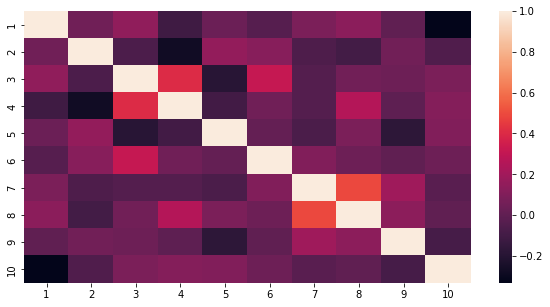

In [7]:
data_corr = sns.heatmap(x_data_df.corr())

In [8]:
def plot_learning_curve(estimator, name, X, y, train_sizes):
    lw=2

    plt.grid()
    plt.title("Learning Curves for " + name)
    plt.ylim(0.0, 1.1)
    plt.xlabel("Training instances")
    plt.ylabel("Accuracy Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, cv=cv, n_jobs=8, train_sizes=train_sizes, scoring="accuracy", return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    plt.plot(train_sizes, train_scores_mean, 'o-', color="darkorange",
                 label="Training score", lw=lw)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.2,
                         color="darkorange", lw=lw)
    plt.plot(train_sizes, test_scores_mean, 'o-', color="navy",
             label="Cross-validation score", lw=lw)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.2,
                         color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()

    # Plot n_samples vs fit_times
    plt.grid()
    plt.plot(train_sizes, fit_times_mean, 'o-')
    plt.fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.2)
    plt.xlabel("Training instances")
    plt.ylabel("fit_times (s)")
    plt.title("Scalability of the model for " + name)
    plt.show()

    # Plot fit_time vs score
    plt.grid()
    plt.plot(fit_times_mean, test_scores_mean, 'o-')
    plt.fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.2)
    plt.xlabel("fit_times (s)")
    plt.ylabel("Accuracy Score")
    plt.title("Performance of the model for " + name)
    plt.show()


<h2>Decision Tree</h2>

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.4s finished


Max Depth Range: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]
Train Scores Mean:
[0.71375    0.780625   0.795      0.82697917 0.87583333 0.9059375
 0.93895833 0.95604167 0.97322917 0.98447917 0.99239583 0.99541667
 0.99739583 0.99822917 0.99895833 0.99947917 0.9996875  1.
 1.         1.        ]
Train Scores Std:
[0.00199283 0.01019238 0.00308305 0.00603268 0.00644319 0.00819945
 0.00669752 0.00635843 0.00502381 0.00444878 0.0032709  0.00302622
 0.00174304 0.00125865 0.00093169 0.00046585 0.00041667 0.
 0.         0.        ]
Validation Scores Mean:
[0.69708333 0.75791667 0.76958333 0.79916667 0.81833333 0.83875
 0.84458333 0.85       0.85208333 0.84541667 0.845      0.84583333
 0.84958333 0.8425     0.84458333 0.8425     0.84041667 0.84291667
 0.84291667 0.84291667]
Validation Scores Std:
[0.00918559 0.01320248 0.01379412 0.01700694 0.02441681 0.00752311
 0.01458928 0.01553446 0.00395285 0.00868028 0.00937268 0.01094494
 0.00549621 0.0147078  0.00

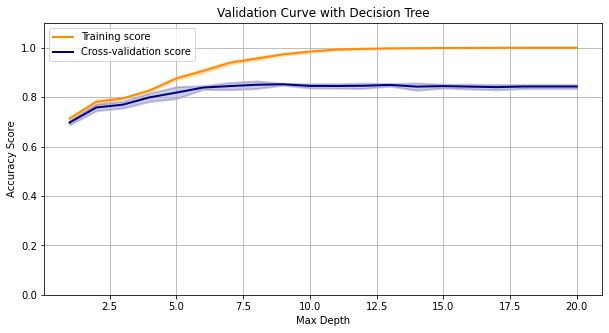

range(1, 21)


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished


Leaf Size Range: range(1, 21)
Train Scores Mean:
[1.         0.97604167 0.96552083 0.954375   0.945625   0.93770833
 0.9315625  0.9234375  0.91802083 0.91302083 0.9078125  0.90125
 0.899375   0.895625   0.89166667 0.88895833 0.8865625  0.88166667
 0.88114583 0.87885417]
Train Scores Std:
[0.         0.00396655 0.00231522 0.00299377 0.00418745 0.00471174
 0.00618543 0.0047393  0.00346423 0.00379887 0.00502813 0.00606139
 0.00669752 0.00745793 0.00717919 0.00732433 0.008433   0.0101283
 0.00973499 0.00870649]
Validation Scores Mean:
[0.84291667 0.83416667 0.8475     0.8425     0.835      0.83416667
 0.84166667 0.84583333 0.84125    0.84375    0.83791667 0.835
 0.83       0.83125    0.83291667 0.82625    0.82416667 0.82333333
 0.825      0.82375   ]
Validation Scores Std:
[0.0083956  0.00829156 0.01113366 0.01197509 0.01024017 0.01226162
 0.00779512 0.00959239 0.01300374 0.01400645 0.01730045 0.01982563
 0.01632993 0.01513825 0.01203294 0.0144698  0.01354006 0.01605113
 0.01849362 0.01522

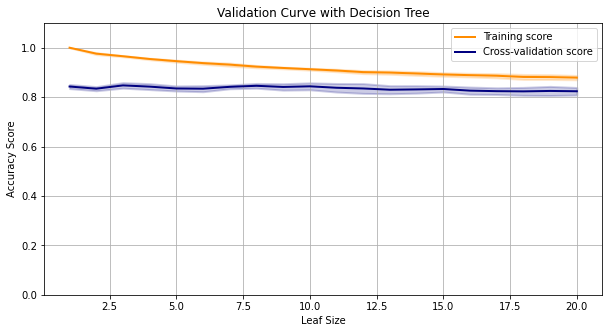

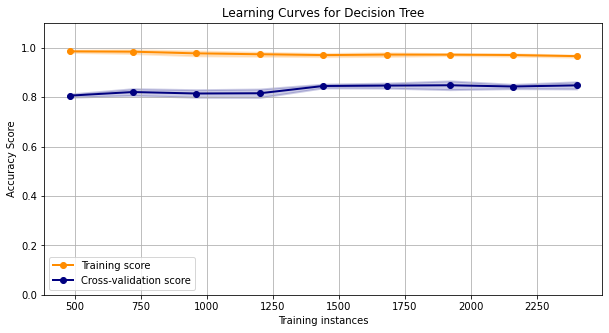

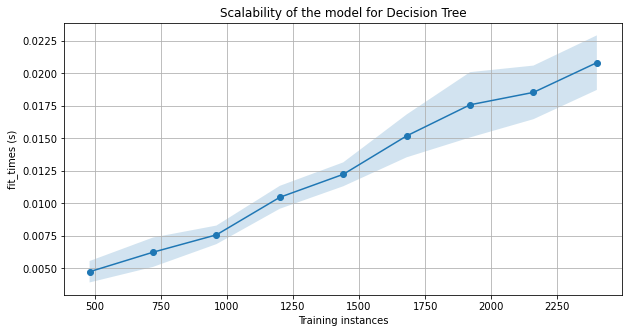

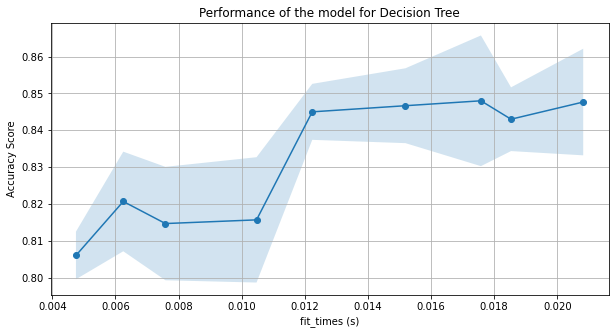

The optimal value of Max Depth was  9 , while the optimal value of Leaf Size was  1 .
The Performance of the Decision Tree classifier was  0.8520833333333332  with the optimized values for the max depth and leaf size hyperparameters.


In [9]:
# Plot cross validation curves for Max Depth and Leaf Size hyperparameters

#### Max Depth
param_range = np.linspace(1, 20, 20)
print(param_range)
train_scores, val_scores = validation_curve(
    DecisionTreeClassifier(random_state = rs), x_train, y_train, param_name="max_depth", 
    param_range=param_range, n_jobs=8,
    scoring='accuracy', verbose=1, cv=cv
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)
print("Max Depth Range:", param_range)
print("Train Scores Mean:")
print(train_scores_mean)
print("Train Scores Std:")
print(train_scores_std)
print("Validation Scores Mean:")
print(val_scores_mean)
print("Validation Scores Std:")
print(val_scores_std)

plt.title("Validation Curve with Decision Tree")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.ylim(0.0, 1.1)
lw=2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, val_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, val_scores_mean -val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.grid()
plt.show()


#### Leaf Size
param_range = range(1,21)
print(param_range)
train_scores, val_scores = validation_curve(
    DecisionTreeClassifier(random_state = rs), x_train, y_train, param_name="min_samples_leaf", 
    param_range=param_range, n_jobs=8,
    scoring='accuracy', verbose=1, cv=cv
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)
print("Leaf Size Range:", param_range)
print("Train Scores Mean:")
print(train_scores_mean)
print("Train Scores Std:")
print(train_scores_std)
print("Validation Scores Mean:")
print(val_scores_mean)
print("Validation Scores Std:")
print(val_scores_std)

plt.title("Validation Curve with Decision Tree")
plt.xlabel("Leaf Size")
plt.ylabel("Accuracy Score")
plt.ylim(0.0, 1.1)
lw=2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, val_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.grid()
plt.show()


# # hyperparameter tuning
param_grid = {'max_depth': range(1, 21), 'min_samples_leaf': range(1, 21)}
tuned_clf = GridSearchCV(estimator = DecisionTreeClassifier(random_state = rs), param_grid = param_grid, cv=cv)

start_time = time.time()
tuned_clf.fit(x_train, y_train)
training_time = time.time() - start_time
start_time = time.time()
tuned_clf.predict(x_test)
testing_time = time.time() - start_time
best_score = tuned_clf.best_score_
best_params = tuned_clf.best_params_


# # plot learning curve for best params
tuned_clf = DecisionTreeClassifier(max_depth=best_params['max_depth'], min_samples_leaf=best_params['min_samples_leaf'], random_state=rs)
plot_learning_curve(tuned_clf, "Decision Tree", x_data, y_data, train_sizes)

print("The optimal value of Max Depth was ", best_params['max_depth'], ", while the optimal value of Leaf Size was ", best_params['min_samples_leaf'], ".")
print("The Performance of the Decision Tree classifier was ", best_score, " with the optimized values for the max depth and leaf size hyperparameters.")


<h2>Neural Networks</h2>

range(1, 21, 5)


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Hidden Layer Sizes: range(1, 21, 5)
Train Scores Mean:
[0.50458333 0.8078125  0.844375   0.85802083]
Train Scores Std:
[0.00020833 0.00378456 0.00338181 0.00506683]
Validation Scores Mean:
[0.50458333 0.80458333 0.84333333 0.85625   ]
Validation Scores Std:
[0.00083333 0.01040833 0.01307032 0.0209165 ]


[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.3s finished


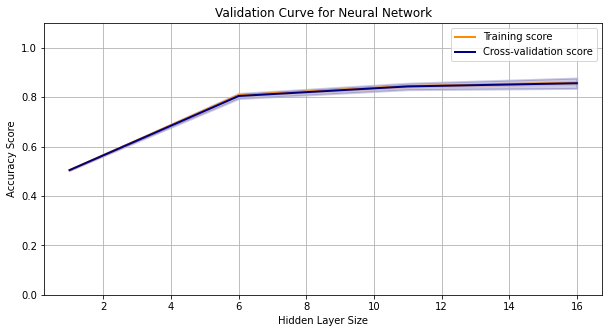

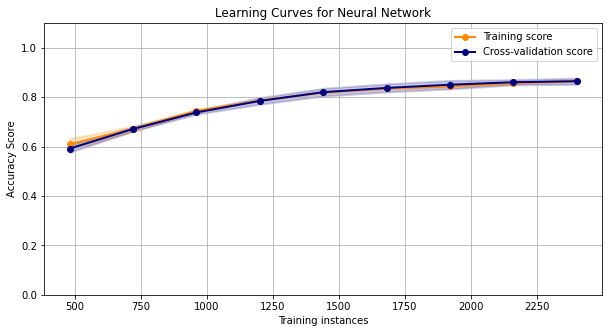

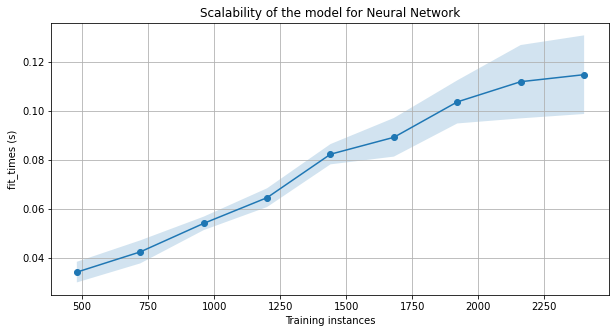

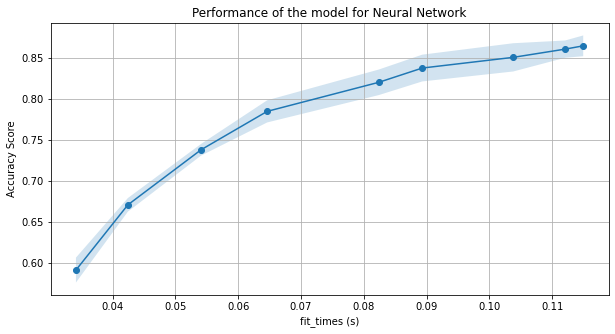

The optimal value of Hidden Layer Sizes was  16 .
The Performance of the Neural Network classifier was  0.85625  with the optimized value for the hidden layer size hyperparameter.


In [10]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Plot cross validation curve for Hidden Layer Size 

#### Hidden Layer Size
param_range = range(1,21,5)
print(param_range)
train_scores, val_scores = validation_curve(
    MLPClassifier(max_iter=20, random_state = rs), x_train, y_train, param_name="hidden_layer_sizes", 
    param_range=param_range, n_jobs=8,
    scoring='accuracy', verbose=1, cv=cv
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)
print("Hidden Layer Sizes:", param_range)
print("Train Scores Mean:")
print(train_scores_mean)
print("Train Scores Std:")
print(train_scores_std)
print("Validation Scores Mean:")
print(val_scores_mean)
print("Validation Scores Std:")
print(val_scores_std)

plt.title("Validation Curve for Neural Network")
plt.xlabel("Hidden Layer Size")
plt.ylabel("Accuracy Score")
plt.ylim(0.0, 1.1)
lw=2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, val_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, val_scores_mean -val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.grid()
plt.show()


# # hyperparameter tuning
param_grid = {'hidden_layer_sizes': range(1, 21, 5)}
tuned_clf = GridSearchCV(estimator = MLPClassifier(max_iter=20, random_state = rs), param_grid = param_grid, cv=cv)

start_time = time.time()
tuned_clf.fit(x_train, y_train)
training_time = time.time() - start_time
start_time = time.time()
tuned_clf.predict(x_test)
testing_time = time.time() - start_time
best_score = tuned_clf.best_score_
best_params = tuned_clf.best_params_


# # plot learning curve for best params
tuned_clf = MLPClassifier(max_iter=20, hidden_layer_sizes=best_params['hidden_layer_sizes'], random_state=rs)
plot_learning_curve(tuned_clf, "Neural Network", x_data, y_data, train_sizes)

print("The optimal value of Hidden Layer Sizes was ", best_params['hidden_layer_sizes'], ".")
print("The Performance of the Neural Network classifier was ", best_score, " with the optimized value for the hidden layer size hyperparameter.")


<h1> Boosting </h1>

range(1, 11)


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Max Depth Range: range(1, 11)
Train Scores Mean:
[0.84645833 0.91625    0.963125   0.98947917 0.99927083 1.
 1.         1.         1.         1.        ]
Train Scores Std:
[0.00551592 0.00393083 0.00544663 0.0010623  0.00025516 0.
 0.         0.         0.         0.        ]
Validation Scores Mean:
[0.82708333 0.8725     0.905      0.91875    0.92166667 0.92458333
 0.9275     0.92666667 0.92125    0.90916667]
Validation Scores Std:
[0.01748015 0.0176973  0.01522972 0.01490712 0.01983438 0.0167912
 0.01594261 0.01409295 0.01280191 0.02395743]


[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    9.5s finished


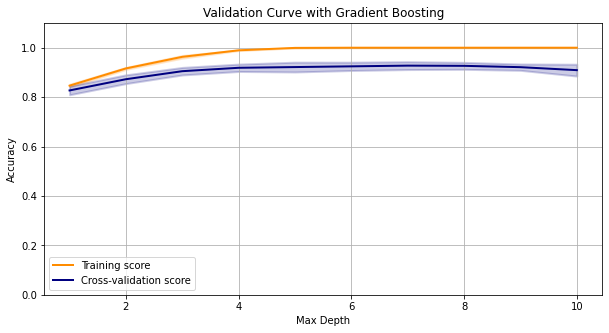

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


range(1, 11)
Leaf Size Range: range(1, 11)
Train Scores Mean:
[0.963125   0.96395833 0.9634375  0.9640625  0.96364583 0.96291667
 0.96333333 0.9628125  0.96177083 0.96197917]
Train Scores Std:
[0.00544663 0.00574713 0.00502165 0.00614495 0.00526428 0.00513912
 0.00465381 0.00354167 0.00410898 0.00596576]
Validation Scores Mean:
[0.905      0.90583333 0.9075     0.90583333 0.90458333 0.90833333
 0.90833333 0.90666667 0.90583333 0.90541667]
Validation Scores Std:
[0.01522972 0.02021585 0.02118864 0.01911224 0.01855921 0.01702735
 0.01958777 0.019338   0.01754953 0.01979057]


[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    4.9s finished


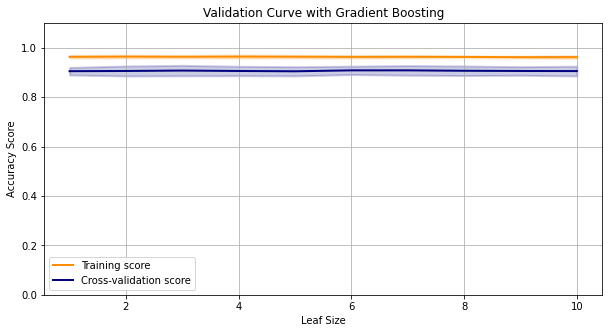

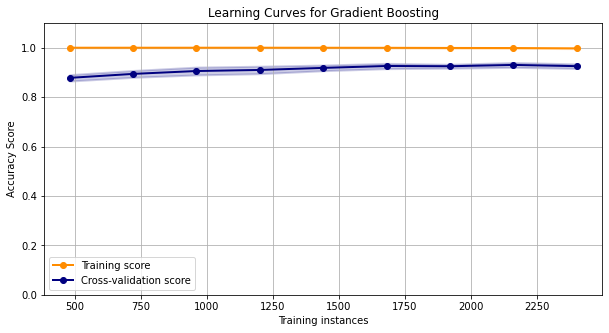

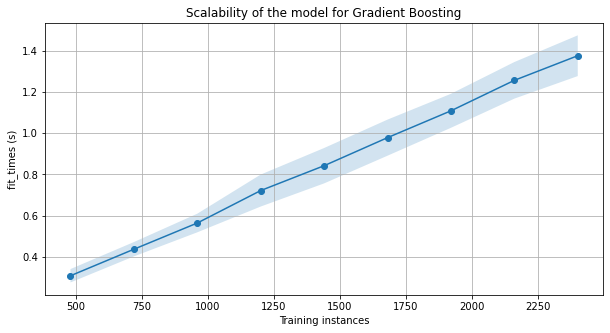

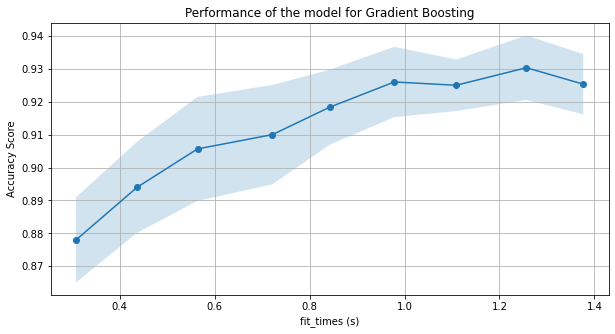

The optimal value of Max Depth was  5 , while the optimal value of Leaf Size was  4 .
The Performance of the Gradient Boosting classifier was  0.9245833333333333  with the optimized values for the max depth and leaf size hyperparameters.


In [11]:
# Plot cross validation curve for Max Depth and Leaf Size

#### Max Depth
param_range = range(1,11)
print(param_range)
train_scores, val_scores = validation_curve(
    GradientBoostingClassifier(random_state = rs), x_train, y_train, param_name="max_depth", 
    param_range=param_range, n_jobs=8,
    scoring='accuracy', verbose=1, cv=cv
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)
print("Max Depth Range:", param_range)
print("Train Scores Mean:")
print(train_scores_mean)
print("Train Scores Std:")
print(train_scores_std)
print("Validation Scores Mean:")
print(val_scores_mean)
print("Validation Scores Std:")
print(val_scores_std)

plt.title("Validation Curve with Gradient Boosting")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.ylim(0.0, 1.1)
lw=2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, val_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, val_scores_mean -val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.grid()
plt.show()


#### Leaf Size
param_range = range(1, 11)
print(param_range)
train_scores, val_scores = validation_curve(
    GradientBoostingClassifier(random_state = rs), x_train, y_train, param_name="min_samples_leaf", 
    param_range=param_range, n_jobs=8,
    scoring='accuracy', verbose=1, cv=cv
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)
print("Leaf Size Range:", param_range)
print("Train Scores Mean:")
print(train_scores_mean)
print("Train Scores Std:")
print(train_scores_std)
print("Validation Scores Mean:")
print(val_scores_mean)
print("Validation Scores Std:")
print(val_scores_std)

plt.title("Validation Curve with Gradient Boosting")
plt.xlabel("Leaf Size")
plt.ylabel("Accuracy Score")
plt.ylim(0.0, 1.1)
lw=2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, val_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.grid()
plt.show()


# # hyperparameter tuning
param_grid = {'max_depth': range(1,6), 'min_samples_leaf': range(1, 6)}
tuned_clf = GridSearchCV(estimator = GradientBoostingClassifier(random_state = rs), param_grid = param_grid, cv=cv)

start_time = time.time()
tuned_clf.fit(x_train, y_train)
training_time = time.time() - start_time
start_time = time.time()
tuned_clf.predict(x_test)
testing_time = time.time() - start_time
best_score = tuned_clf.best_score_
best_params = tuned_clf.best_params_


# # plot learning curve for best params
tuned_clf = GradientBoostingClassifier(max_depth=best_params['max_depth'], min_samples_leaf=best_params['min_samples_leaf'], random_state=rs)
plot_learning_curve(tuned_clf, "Gradient Boosting", x_data, y_data, train_sizes)

print("The optimal value of Max Depth was ", best_params['max_depth'], ", while the optimal value of Leaf Size was ", best_params['min_samples_leaf'], ".")
print("The Performance of the Gradient Boosting classifier was ", best_score, " with the optimized values for the max depth and leaf size hyperparameters.")


<h1>k-Nearest Neighbor</h1>

range(1, 21)


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


n-Neighbors: range(1, 21)
Train Scores Mean:
[1.         0.96645833 0.9740625  0.96895833 0.96822917 0.9684375
 0.964375   0.964375   0.9621875  0.96375    0.96291667 0.96260417
 0.96083333 0.9615625  0.95864583 0.96020833 0.956875   0.95864583
 0.95645833 0.95895833]
Train Scores Std:
[0.         0.00264756 0.00159344 0.00344853 0.0050604  0.00290175
 0.00196541 0.00125865 0.00386401 0.00352631 0.00328414 0.00341374
 0.00152383 0.0032342  0.00227265 0.00274811 0.00336573 0.00207289
 0.0025     0.00339781]
Validation Scores Mean:
[0.93625    0.92916667 0.94958333 0.94833333 0.95041667 0.95
 0.95041667 0.95208333 0.955      0.95583333 0.95333333 0.95375
 0.95041667 0.95       0.95041667 0.95208333 0.95291667 0.95375
 0.95291667 0.95333333]
Validation Scores Std:
[0.01008643 0.00574335 0.01759893 0.01673942 0.01427653 0.01629801
 0.01105542 0.01045825 0.01138042 0.00962852 0.01226162 0.01451771
 0.01217637 0.0147902  0.0165307  0.01891134 0.01785357 0.01956116
 0.01866183 0.02064919]


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    3.2s finished


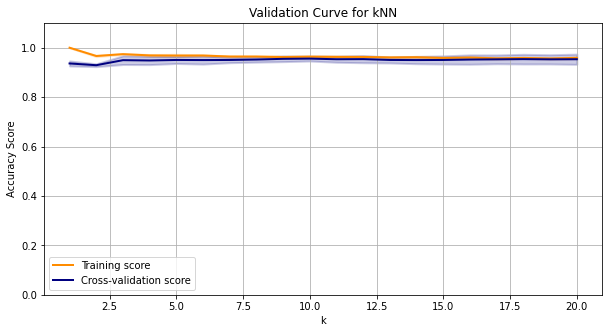

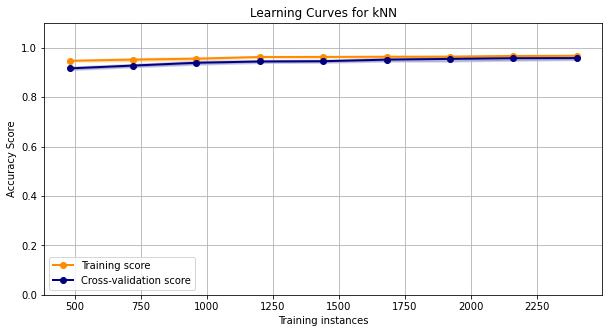

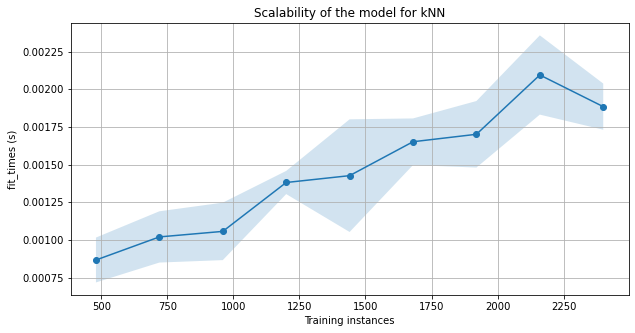

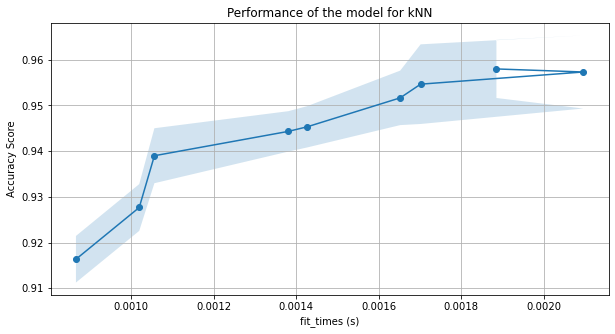

The optimal value of n-Neighbors was  10 .
The Performance of the kNN classifier was  0.9558333333333333  with the optimized value for the n_neighbors hyperparameters.


In [10]:
#### k value
param_range = range(1,21)
print(param_range)
train_scores, val_scores = validation_curve(
    KNeighborsClassifier(), x_train, y_train, param_name="n_neighbors", 
    param_range=param_range, n_jobs=8,
    scoring='accuracy', verbose=1, cv=cv
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)
print("n-Neighbors:", param_range)
print("Train Scores Mean:")
print(train_scores_mean)
print("Train Scores Std:")
print(train_scores_std)
print("Validation Scores Mean:")
print(val_scores_mean)
print("Validation Scores Std:")
print(val_scores_std)

plt.title("Validation Curve for kNN")
plt.xlabel("k")
plt.ylabel("Accuracy Score")
plt.ylim(0.0, 1.1)
lw=2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, val_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, val_scores_mean -val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.grid()
plt.show()


# # hyperparameter tuning
param_grid = {'n_neighbors': range(1, 21)}
tuned_clf = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = param_grid, cv=cv)

start_time = time.time()
tuned_clf.fit(x_train, y_train)
training_time = time.time() - start_time
start_time = time.time()
tuned_clf.predict(x_test)
testing_time = time.time() - start_time
best_score = tuned_clf.best_score_
best_params = tuned_clf.best_params_


# # plot learning curve for best params
tuned_clf = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'])
plot_learning_curve(tuned_clf, "kNN", x_data, y_data, train_sizes)

print("The optimal value of n-Neighbors was ", best_params['n_neighbors'], ".")
print("The Performance of the kNN classifier was ", best_score, " with the optimized value for the n_neighbors hyperparameters.")